## DSCI 552: Machine Learning for Data Science
Problem Set 1

Yifei Li

## Import libraries and the dataset

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [2]:
# Import the dataset
car_info = pd.read_csv('./task1/used_car_dataset.csv')
car_info

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,18924.0,2017.0,ford,good,4 cylinders,gas,122612.0,automatic,sedan,silver,3588,2.202934,0.212334,b
9993,4248.0,2002.0,ford,like new,6 cylinders,gas,NaN,automatic,sedan,silver,157,2.147843,0.070923,a
9994,26269.0,2017.0,ford,excellent,6 cylinders,gas,52541.0,automatic,SUV,white,1499,2.392569,0.094751,c
9995,6149.0,2013.0,ford,good,4 cylinders,gas,197000.0,automatic,SUV,black,180,2.269796,0.129762,a


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='F1', ylabel='price'>,
        <AxesSubplot:xlabel='F2', ylabel='price'>,
        <AxesSubplot:xlabel='F3', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='odometer', ylabel='year'>,
        <AxesSubplot:xlabel='F1', ylabel='year'>,
        <AxesSubplot:xlabel='F2', ylabel='year'>,
        <AxesSubplot:xlabel='F3', ylabel='year'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='year', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='F1', ylabel='odometer'>,
        <AxesSubplot:xlabel='F2', ylabel='odometer'>,
        <AxesSubplot:xlabel='F3', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price

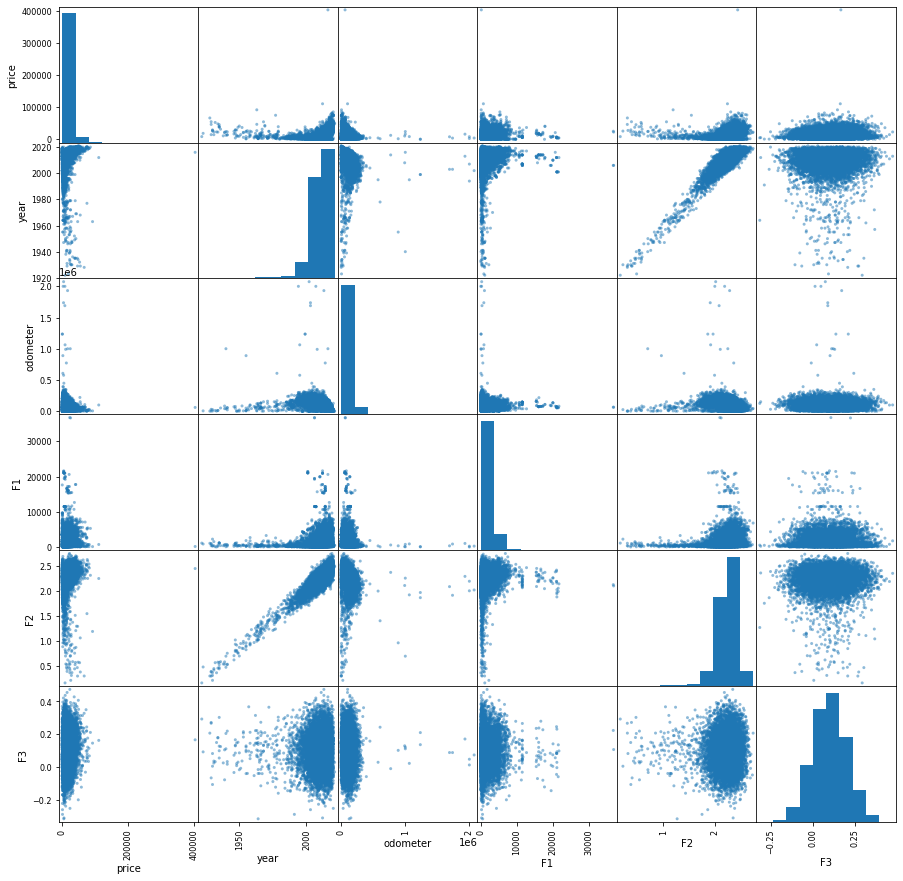

In [3]:
# Plotting out the dataset
pd.plotting.scatter_matrix(car_info, alpha=.5, figsize=(15,15))

## Data cleaning and encoding

In [4]:
#Drop rows without price (zero price)
car_info = car_info[car_info['price']!=0]

#Drop rows with NaN values
car_info = car_info.dropna(axis=0)
car_info

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,7589.0,2008.0,ford,excellent,6 cylinders,gas,96800.0,automatic,SUV,white,329,2.123854,-0.016047,b
9992,18924.0,2017.0,ford,good,4 cylinders,gas,122612.0,automatic,sedan,silver,3588,2.202934,0.212334,b
9994,26269.0,2017.0,ford,excellent,6 cylinders,gas,52541.0,automatic,SUV,white,1499,2.392569,0.094751,c
9995,6149.0,2013.0,ford,good,4 cylinders,gas,197000.0,automatic,SUV,black,180,2.269796,0.129762,a


In [5]:
# Some features in the dataset are categorical feature and they need to be encoded numerically.
# 'cylinders' is the only ordinal variable, it can encoded by remove the string 'cylinders'
car_info['cylinders']=car_info['cylinders'].str.strip('cylinders')
car_info.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


In [6]:
# Transfer the data type to integers
car_info['cylinders']=car_info['cylinders'].astype('int64')

In [7]:
# Drop the fuel column since it has no variability
car_info = car_info.drop(columns=['fuel'])
car_info.head()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


In [9]:
# Encode the other categorical features using one hot encoding
car_onehot = pd.get_dummies(car_info)
car_onehot.shape

(9218, 27)

In [10]:
# Most of these features have some outliers. Remove them by applying the normal distribution
z_scores = stats.zscore(car_info.select_dtypes(include='float64'))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
car_df = car_onehot[filtered_entries]
car_df.shape

(8978, 27)

In [13]:
# Correlation matrix to see the general relationships between predictors and prices
corrMatrix = car_df.corr()
print (corrMatrix.iloc[0,:])

price                     1.000000
year                      0.583369
cylinders                 0.192485
odometer                 -0.534487
F1                        0.237476
F2                        0.469717
F3                        0.097212
manufacturer_ford         0.038559
manufacturer_subaru      -0.038559
condition_excellent       0.052450
condition_fair           -0.178452
condition_good           -0.093888
condition_like new        0.157643
transmission_automatic    0.064706
transmission_manual      -0.064706
type_SUV                 -0.106911
type_pickup               0.226169
type_sedan               -0.291870
type_truck                0.216281
paint_color_black         0.033288
paint_color_blue         -0.020105
paint_color_red           0.002036
paint_color_silver       -0.076639
paint_color_white         0.044348
F4_a                     -0.006568
F4_b                     -0.006221
F4_c                      0.013046
Name: price, dtype: float64


In [15]:
# T-test to see the general relationships between predictors and prices
#first row: t-score, second row: p-value
t_test = f_regression(car_df.iloc[:,1:], car_df['price'])
t_columns = car_df.columns[1:]
t_test = pd.DataFrame(t_test, columns=t_columns)
print(t_test)

          year     cylinders     odometer             F1           F2  \
0  4630.580935  3.453625e+02  3589.732393   5.364554e+02  2541.054334   
1     0.000000  1.127224e-75     0.000000  2.555239e-115     0.000000   

             F3  manufacturer_ford  manufacturer_subaru  condition_excellent  \
0  8.563381e+01          13.365635            13.365635         2.476101e+01   
1  2.665214e-20           0.000258             0.000258         6.610233e-07   

   condition_fair  ...     type_sedan    type_truck  paint_color_black  \
0    2.952455e+02  ...   8.358541e+02  4.404809e+02           9.957182   
1    3.912881e-65  ...  8.253274e-176  1.633092e-95           0.001608   

   paint_color_blue  paint_color_red  paint_color_silver  paint_color_white  \
0          3.629564         0.037218        5.303250e+01          17.688577   
1          0.056794         0.847026        3.557356e-13           0.000026   

       F4_a      F4_b      F4_c  
0  0.387206  0.347400  1.527864  
1  0.53378

## Feature selection

In [16]:
#Seperate predictor and the predicted variable
car_df = shuffle(car_df)

y = car_df.iloc[:,:1]
X = car_df.iloc[:,1:]

    cycle           Added_feature      neg_mse
0       1                    year -79899728.18
1       2               cylinders -64215237.72
2       3                odometer -53816443.24
3       4              type_sedan -50447176.12
4       5                type_SUV -46306799.21
5       6                      F3 -45185962.84
6       7       manufacturer_ford -44572306.33
7       8     transmission_manual -44179220.25
8       9       paint_color_white -43911817.15
9      10                      F1 -43662651.11
10     11      condition_like new -43552008.49
11     12      paint_color_silver -43495254.79
12     13             type_pickup -43470445.23
13     14        paint_color_blue -43444152.40
14     15     condition_excellent -43424861.55
15     16                    F4_a -43417140.34
16     17          condition_fair -43412768.94
17     18       paint_color_black -43409896.31
18     19  transmission_automatic -43409896.31
19     20          condition_good -43409896.31
20     21    

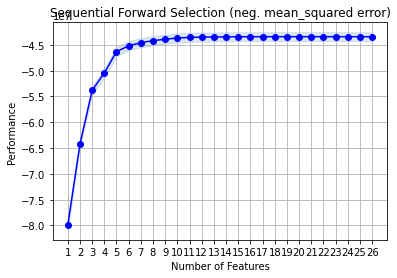

In [168]:
# Build the regression model to use in feature selection
regr = linear_model.LinearRegression()

# sequantial forward selection to help identify
sfs1 = sfs(regr,
           k_features=26,
           forward=True,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=10)

sfs1 = sfs1.fit(X, y)

#output the added feature dataframe
f_cycle = []
f_names = []
f_added = []
f_nmse = []

for k,v in sfs1.subsets_.items():
    f_cycle.append(k)
    f_names.append(set(v['feature_names']))
    f_nmse.append(v['avg_score'].round(2))

for i in range(len(f_names)):
    if i == 0:
        f = f_names[0]
    else:
        f = f_names[i]^f_names[i-1]        
    f_added.append(list(f)[0])

result = pd.DataFrame({'cycle':f_cycle,'Added_feature':f_added,'neg_mse':f_nmse})
print(result)

# Generate the performance figure
fig = plot_sfs(sfs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. std_err)')
plt.grid()
plt.show()

In [173]:
# shuffle data for backward selection
car_df = shuffle(car_df)

y = car_df.iloc[:,:1]
X = car_df.iloc[:,1:]

    cycle        Removed_features      neg_mse
0      26                    year -43406872.62
1      25              type_sedan -43403777.94
2      24                type_SUV -43403777.94
3      23                odometer -43403777.94
4      22               cylinders -43397501.35
5      21                      F3 -43397501.35
6      20     manufacturer_subaru -43397501.35
7      19     transmission_manual -43397501.35
8      18       paint_color_white -43397501.35
9      17                      F1 -43402566.50
10     16          condition_good -43415811.49
11     15     condition_excellent -43433701.64
12     14          condition_fair -43462470.92
13     13       paint_color_black -43511797.18
14     12         paint_color_red -43578265.81
15     11             type_pickup -43614340.71
16     10                    F4_c -43642553.49
17      9        paint_color_blue -43894500.26
18      8  transmission_automatic -44164707.07
19      7       manufacturer_ford -44553365.76
20      6    

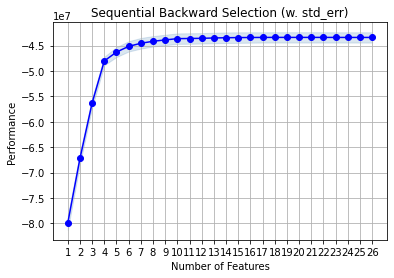

In [240]:
# Build the regression model to use in feature selection
regr = linear_model.LinearRegression()

sbs1 = sfs(regr,
           k_features=1,
           forward=False,
           floating=False,
           scoring='neg_mean_squared_error',
           cv=10)

sbs1 = sbs1.fit(X, y)

#output the added feature dataframe
b_cycle = []
b_names = []
b_removed = []
b_nmse = []

for k,v in sbs1.subsets_.items():
    b_cycle.append(k)
    b_names.append(set(v['feature_names']))
    b_nmse.append(v['avg_score'].round(2))

for i in range(len(b_names)-1,-1,-1):
    if i == len(b_names)-1:
        f = b_names[i]
    else:
        f = b_names[i]^b_names[i+1]        
    b_removed.append(list(f)[0])

result = pd.DataFrame({'cycle':b_cycle,'Removed_features':b_removed,'neg_mse':b_nmse})
print(result)

# Generate the performance figure               
fig = plot_sfs(sbs1.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. std_err)')
plt.grid()
plt.show()

In [180]:
#Combine the result from the forward selection and backward selection, below features are selected
car_sf = car_df[['price','year','cylinders','odometer','F1','F3','type_SUV','type_sedan', 'manufacturer_ford']]

#Examine the correlation betweeen each features
corrMatrix = car_sf.corr()
print (corrMatrix)

                      price      year  cylinders  odometer        F1  \
price              1.000000  0.583369   0.192485 -0.534487  0.237476   
year               0.583369  1.000000  -0.265273 -0.527289  0.218687   
cylinders          0.192485 -0.265273   1.000000  0.197708  0.009211   
odometer          -0.534487 -0.527289   0.197708  1.000000 -0.229027   
F1                 0.237476  0.218687   0.009211 -0.229027  1.000000   
F3                 0.097212  0.004921  -0.004537 -0.001873 -0.004789   
type_SUV          -0.106911  0.057279  -0.199594  0.025473 -0.011972   
type_sedan        -0.291870  0.053826  -0.491184 -0.056789 -0.025318   
manufacturer_ford  0.038559 -0.073211   0.401765  0.065352  0.031621   

                         F3  type_SUV  type_sedan  manufacturer_ford  
price              0.097212 -0.106911   -0.291870           0.038559  
year               0.004921  0.057279    0.053826          -0.073211  
cylinders         -0.004537 -0.199594   -0.491184           0.4017

In [181]:
# F test between each features and price, all the selected features are statiscally significant related to the price
f_regression(car_sf.iloc[:,1:], car_sf['price'])

(array([4630.58093475,  345.36248535, 3589.73239299,  536.45536555,
          85.63381321,  103.78070561,  835.85410678,   13.36563516]),
 array([0.00000000e+000, 1.12722415e-075, 0.00000000e+000, 2.55523918e-115,
        2.66521427e-020, 3.06103295e-024, 8.25327423e-176, 2.57741389e-004]))

### Model training and validation

In [333]:
#Split training and test set
car_sf = shuffle(car_sf)

new_y_train = car_sf.iloc[:-1800,0]#4/5 of the dataset
new_y_test = car_sf.iloc[-1800:,0]

new_X_train = car_sf.iloc[:-1800,1:] #1/5 of the dataset
new_X_test = car_sf.iloc[-1800:,1:]


#### Linear Regression

In [305]:
# Linear regression scores
def lr(X,y):
    regr = linear_model.LinearRegression()
    regr.fit(X,y)

    #k-fold cross validation
    lr_scores = cross_val_score(regr,X,y, cv=10)
    return lr_scores

In [311]:
# calculate average score for linear regression model
lr_scores = lr(new_X_train, new_y_train)
print(lr_scores)
print('The average score is %s.'%(sum(lr_scores)/len(lr_scores)))

[0.59315734 0.61261799 0.62782315 0.64995592 0.6325803  0.65431507
 0.63538952 0.63285843 0.62534283 0.62842596]
The average score is 0.6292466512369657.


In [312]:
# run the linear regression for 10 times and save each scores
i=0
lr_score_list = []
while i < 10:
    car_sf = shuffle(car_sf)
    new_y_train = car_sf.iloc[:-1800,0]
    new_X_train = car_sf.iloc[:-1800,1:] 
    
    lr_scores = lr(new_X_train, new_y_train)
    lr_score_list.extend(lr_scores)
    i+=1

#### Ridge

In [313]:
# Ridge regression scores
def rr(X,y,a):
    reg_ridge = linear_model.Ridge(alpha=a)
    reg_ridge.fit(X,y)

    #k-fold cross validation
    ridge_scores = cross_val_score(reg_ridge,X,y, cv=10)
    return ridge_scores


In [314]:
# calculate average score for ridge regression model
ridge_scores = rr(new_X_train, new_y_train, a=0.01)
print(ridge_scores)
print('The average score is %s.'%(sum(ridge_scores)/len(ridge_scores)))

[0.64501234 0.57898818 0.66504391 0.64094116 0.66626588 0.62893364
 0.66141296 0.61755421 0.5974632  0.66241219]
The average score is 0.636402767166782.


In [315]:
# run the ridge regression for 10 times and save each scores
i=0
rr_score_list = []
while i < 10:
    car_sf = shuffle(car_sf)
    new_y_train = car_sf.iloc[:-1800,0]
    new_X_train = car_sf.iloc[:-1800,1:] 
    
    rr_scores = rr(new_X_train, new_y_train, a=0.01)
    rr_score_list.extend(rr_scores)
    i+=1

#### LASSO

In [320]:
# LASSO regression scores
def ls(X,y,a):
    reg_lasso=linear_model.Lasso(alpha=a)
    reg_lasso.fit(new_X_train, new_y_train)

    #k-fold cross validation
    lasso_scores = cross_val_score(reg_lasso,new_X_train, new_y_train, cv=10)
    return lasso_scores

In [321]:
# calculate average score for LASSO regression model
lasso_scores = ls(new_X_train, new_y_train, a=0.1)
print(lasso_scores)
print('The average score is %s.'%(sum(lasso_scores)/len(lasso_scores)))

[0.6953081  0.61232699 0.57777902 0.61630112 0.62796979 0.61702557
 0.63217593 0.61557781 0.67551837 0.64002661]
The average score is 0.6310009312826492.


In [322]:
# run the LASSO regression for 10 times and save each scores
i=0
ls_score_list = []
while i < 10:
    car_sf = shuffle(car_sf)
    new_y_train = car_sf.iloc[:-1800,0]
    new_X_train = car_sf.iloc[:-1800,1:] 
    
    ls_scores = ls(new_X_train, new_y_train, a=0.01)
    ls_score_list.extend(ls_scores)
    i+=1

### Elastic Net

In [323]:
# Elastic Nest regression scores
def en(X,y,a):    
    reg_elastic=linear_model.ElasticNet(alpha=a)
    reg_elastic.fit(new_X_train, new_y_train)

    #k-fold cross validation
    elastic_scores = cross_val_score(reg_elastic,new_X_train, new_y_train, cv=10)
    return elastic_scores

In [324]:
# calculate average score for Elastic Net regression model
elastic_scores = en(new_X_train, new_y_train, a=0.001)
print(elastic_scores)
print('The average score is %s.'%(sum(elastic_scores)/len(elastic_scores)))

[0.64616375 0.60964355 0.65463232 0.59735782 0.64950964 0.64293573
 0.67042174 0.61198257 0.60959951 0.62548207]
The average score is 0.6317728689205413.


In [325]:
# run the Elastic Net regression for 10 times and save each scores
i=0
en_score_list = []
while i < 10:
    car_sf = shuffle(car_sf)
    new_y_train = car_sf.iloc[:-1800,0]
    new_X_train = car_sf.iloc[:-1800,1:] 
    
    en_scores = en(new_X_train, new_y_train, a=0.01)
    en_score_list.extend(en_scores)
    i+=1

#### Model Evaluation

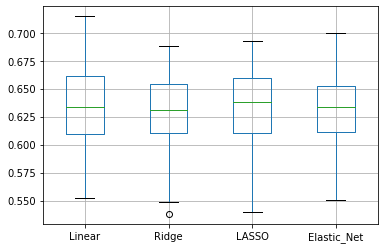

In [329]:
# R2 score distribution of each model
model_evlu = pd.DataFrame({'Linear':lr_score_list, 'Ridge':rr_score_list, 'LASSO':ls_score_list, 'Elastic_Net': en_score_list })
boxplot = model_evlu.boxplot()

In [332]:
#Check if significant difference exists
anova = stats.f_oneway(lr_score_list, rr_score_list, ls_score_list, en_score_list)
print(anova)

F_onewayResult(statistic=0.5613207187342808, pvalue=0.6408290784714957)


### Final test

In [337]:
#test set description
new_X_test.describe()

,year,cylinders,odometer,F1,F3,type_SUV,type_sedan,manufacturer_ford
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,2010.874444,5.897778,110149.646111,1572.727778,0.099111,0.314444,0.286111,0.884444
std,5.653101,1.608273,60035.202967,2135.256899,0.099555,0.464423,0.452068,0.319780
min,1988.000000,4.000000,0.000000,7.000000,-0.198324,0.000000,0.000000,0.000000
25%,2008.000000,4.000000,66958.750000,318.750000,0.029112,0.000000,0.000000,1.000000
50%,2012.000000,6.000000,110642.000000,774.500000,0.101366,0.000000,0.000000,1.000000
75%,2015.000000,8.000000,149000.000000,2119.250000,0.167321,1.000000,1.000000,1.000000
max,2021.000000,8.000000,336000.000000,21067.000000,0.381452,1.000000,1.000000,1.000000


In [335]:
#Train and apply the LASSO model to the test set
reg_lasso=linear_model.Lasso(alpha=0.1)
reg_lasso.fit(new_X_train, new_y_train)
new_y_pred = reg_lasso.predict(new_X_test)
                               
print('Coefficients: \n', reg_lasso.coef_)
print('Intercept: \n', reg_lasso.intercept_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(new_y_test, new_y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.3f'
      % r2_score(new_y_test, new_y_pred))

Coefficients: 
 [ 8.94396286e+02  1.28045226e+03 -5.83395092e-02  2.55200860e-01
  1.05515960e+04 -5.59405195e+03 -8.72992507e+03 -2.81743653e+03]
Intercept: 
 -1780195.3522510473
Mean squared error: 39897663.38
Coefficient of determination: 0.677


## Extra: Kaggle Challenge

In [158]:
challenge = pd.read_csv('./task1/used_car_dataset_PREDICT.csv')
challenge.head()

,row_number,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,0,2005.0,ford,good,6 cylinders,gas,100963.0,automatic,sedan,red,437,2.063736,0.006316,b
1,1,2018.0,ford,excellent,6 cylinders,gas,51473.0,automatic,pickup,black,4160,2.544161,0.113114,c
2,2,2013.0,ford,excellent,8 cylinders,gas,170000.0,automatic,truck,white,3836,2.316476,0.061427,a
3,3,2016.0,ford,good,4 cylinders,gas,83755.0,automatic,sedan,white,1690,2.338129,0.064887,c
4,4,2011.0,ford,excellent,4 cylinders,gas,61434.0,automatic,sedan,silver,3293,2.234623,0.215401,b


In [159]:
challenge['cylinders']=challenge['cylinders'].str.strip('cylinders')
challenge['cylinders']=challenge['cylinders'].astype('int64')
challenge.head()

,row_number,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,0,2005.0,ford,good,6,gas,100963.0,automatic,sedan,red,437,2.063736,0.006316,b
1,1,2018.0,ford,excellent,6,gas,51473.0,automatic,pickup,black,4160,2.544161,0.113114,c
2,2,2013.0,ford,excellent,8,gas,170000.0,automatic,truck,white,3836,2.316476,0.061427,a
3,3,2016.0,ford,good,4,gas,83755.0,automatic,sedan,white,1690,2.338129,0.064887,c
4,4,2011.0,ford,excellent,4,gas,61434.0,automatic,sedan,silver,3293,2.234623,0.215401,b


In [160]:
challenge = pd.get_dummies(challenge)
challenge.head()

,row_number,year,cylinders,odometer,F1,F2,F3,manufacturer_ford,manufacturer_subaru,condition_excellent,...,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_red,paint_color_silver,paint_color_white,F4_a,F4_b,F4_c
0,0,2005.0,6,100963.0,437,2.063736,0.006316,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1,2018.0,6,51473.0,4160,2.544161,0.113114,1,0,1,...,0,0,1,0,0,0,0,0,0,1
2,2,2013.0,8,170000.0,3836,2.316476,0.061427,1,0,1,...,0,1,0,0,0,0,1,1,0,0
3,3,2016.0,4,83755.0,1690,2.338129,0.064887,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,4,2011.0,4,61434.0,3293,2.234623,0.215401,1,0,1,...,1,0,0,0,0,1,0,0,1,0


In [165]:
sd_challenge = challenge[['year','cylinders','odometer','F1','F3','type_SUV','type_sedan', 'manufacturer_ford']]
sd_challenge.head()

,year,cylinders,odometer,F1,F3,type_SUV,type_sedan,manufacturer_ford
0,2005.0,6,100963.0,437,0.006316,0,1,1
1,2018.0,6,51473.0,4160,0.113114,0,0,1
2,2013.0,8,170000.0,3836,0.061427,0,0,1
3,2016.0,4,83755.0,1690,0.064887,0,1,1
4,2011.0,4,61434.0,3293,0.215401,0,1,1


In [336]:
lasso_y_pred = reg_lasso.predict(sd_challenge)
prediction = lasso_y_pred.round(2)
prediction_positive = []

for p in prediction:
    if p < 0:
        prediction_positive.append(0)
    else:
        prediction_positive.append(p)
Id = [i for i in range(3403)]

result = pd.DataFrame({'Id': Id, 'Predicted':prediction_positive})

result.to_csv('kaggle_challenge.csv', index=False)